<a href="https://colab.research.google.com/github/bishtanuj/AQUAP/blob/main/AQUAP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Devfolio Hackathon**

**Project Title:** *_Air Quality Prediction_*

**Team Name:** *_Code Mania_*

**About Dataset**

**T:** Average Temperature (°C) <br>
**TM:** Maximum temperature (°C) <br>
**Tm:** Minimum temperature (°C) <br>
**SLP:** Atmospheric pressure at sea level (hPa) <br>
**H:** Average relative humidity (%) <br>
**VV:** Average visibility (Km) <br>
**V:** Average wind speed (Km/h) <br>
**VM:** Maximum sustained wind speed (Km/h) <br>
**PM2.5:** AQI Data <br>
**Conclusion:** Gives the conclusion about AQI

### Setup the notebook

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete



### Load and examine the data

In this step we will load the data
* Load the data into DataFrame called `aquap_data`.
* The corresponding filepath is `aquap_filepath`.



In [ ]:
# Path of the file to read
aquap_filepath = "/content/dataset.csv"

# Read the file into a variable aquap_data
aquap_data = pd.read_csv(aquap_filepath)

In [ ]:
# Checking that the dataset loaded completely
aquap_data

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Conclusion
0,0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833,Poor
1,1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500,Moderate
2,2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500,Moderate
3,3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333,Poor
4,4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833,Poor
...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,18.1,24.0,11.2,1015.4,56,1.8,15.9,25.9,288.416667,Poor
1089,1089,17.8,25.0,10.7,1015.8,54,2.3,9.4,22.2,256.833333,Poor
1090,1090,13.9,24.5,11.4,1015.0,95,0.6,8.7,14.8,169.000000,Moderate
1091,1091,16.3,23.0,9.8,1016.9,78,1.1,7.4,16.5,186.041667,Moderate


##### Removing the `Unnamed: 0` column from the dataset

In [ ]:
aquap_data = aquap_data.drop(columns='Unnamed: 0')

In [ ]:
# Printing the first five rows of the dataset to check that the modification is done or not.
aquap_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Conclusion
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833,Poor
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500,Moderate
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500,Moderate
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333,Poor
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833,Poor


In [ ]:
# Printing the number of dimensions of dataset - aquap_data
aquap_data.shape

(1093, 10)

#### Creating Dummy Variables

In [ ]:
aquap_data['Good'] = aquap_data.Conclusion.map({'Good': 1, 'Satisfactory': 0, 'Moderate': 0, 'Poor': 0, 'Very Poor': 0, 'Severe': 0})
aquap_data['Satisfactory'] = aquap_data.Conclusion.map({'Good': 0, 'Satisfactory': 1, 'Moderate': 0, 'Poor': 0, 'Very Poor': 0, 'Severe': 0})
aquap_data['Moderate'] = aquap_data.Conclusion.map({'Good': 0, 'Satisfactory': 0, 'Moderate': 1, 'Poor': 0, 'Very Poor': 0, 'Severe': 0})
aquap_data['Poor'] = aquap_data.Conclusion.map({'Good': 0, 'Satisfactory': 0, 'Moderate': 0, 'Poor': 1, 'Very Poor': 0, 'Severe': 0})
aquap_data['Very Poor'] = aquap_data.Conclusion.map({'Good': 0, 'Satisfactory': 0, 'Moderate': 0, 'Poor': 0, 'Very Poor': 1, 'Severe': 0})
aquap_data['Severe'] = aquap_data.Conclusion.map({'Good': 0, 'Satisfactory': 0, 'Moderate': 0, 'Poor': 0, 'Very Poor': 0, 'Severe': 1})

In [ ]:
# Printing the first five rows of the dataset after creating the dummy variables
aquap_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Conclusion,Good,Satisfactory,Moderate,Poor,Very Poor,Severe
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833,Poor,0,0,0,1,0,0
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500,Moderate,0,0,1,0,0,0
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500,Moderate,0,0,1,0,0,0
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333,Poor,0,0,0,1,0,0
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833,Poor,0,0,0,1,0,0


#### Removing `Conclusion` coulumn

In [ ]:
aquap_data = aquap_data.drop(columns='Conclusion')

In [ ]:
# Printing the first five rows of the dataset after removing conclusion column
aquap_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Good,Satisfactory,Moderate,Poor,Very Poor,Severe
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833,0,0,0,1,0,0
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500,0,0,1,0,0,0
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500,0,0,1,0,0,0
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333,0,0,0,1,0,0
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833,0,0,0,1,0,0


In [ ]:
# Generate descriptive statistics of dataset
aquap_data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Good,Satisfactory,Moderate,Poor,Very Poor,Severe
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984,0.313815,0.248856,0.268984,0.139067,0.025618,0.003660
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790,0.464255,0.432548,0.443635,0.346175,0.158064,0.060412
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



### Data Preprocessing

#### Dealing with missing data

In [ ]:
aquap_data.isnull().sum()

T               0
TM              0
Tm              0
SLP             0
H               0
VV              0
V               0
VM              0
PM 2.5          1
Good            0
Satisfactory    0
Moderate        0
Poor            0
Very Poor       0
Severe          0
dtype: int64

#### Removing Missing Values

In [ ]:
aquap_data.dropna(inplace=True)
aquap_data.isnull().sum()

T               0
TM              0
Tm              0
SLP             0
H               0
VV              0
V               0
VM              0
PM 2.5          0
Good            0
Satisfactory    0
Moderate        0
Poor            0
Very Poor       0
Severe          0
dtype: int64

### Choosing Model

In [ ]:
# Importing packages for applying machine learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
feature = aquap_data
feature = feature.drop(columns='PM 2.5')
feature = feature.drop(columns='Good')
feature = feature.drop(columns='Satisfactory')
feature = feature.drop(columns='Moderate')
feature = feature.drop(columns='Poor')
feature = feature.drop(columns='Very Poor')
feature = feature.drop(columns='Severe')

In [ ]:
# Printing the first five rows of the feature table
print("Feature Data")
feature.head()

Feature Data


,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2


In [ ]:
label = aquap_data['PM 2.5']

In [ ]:
# Printing the first five rows of the label table
print("Label Data")
label.head()

Label Data


0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

Divide the data into training and testing modules

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, label, test_size=0.3, random_state=100)

In [ ]:
print(X_train.shape, Y_train.shape)

(764, 8) (764,)


In [ ]:
print(X_test.shape, Y_test.shape)

(328, 8) (328,)


### Model training with Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

### Prediction using Linear Regression

In [ ]:
Y_Predict = lr.predict(X_test)

In [ ]:
Y_Predict

array([ 198.1027854 ,  148.11273263,  163.11062577,   34.10496446,
         55.02192025,   72.9666202 ,   25.55757433,   15.01547892,
        130.58084453,   89.80281101,  119.81210606,  193.08565034,
         74.528141  ,  181.93239951,   47.4671541 ,   95.74542393,
        127.19721863,   58.36191608,  141.22291726,   47.26040193,
        103.15523897,  126.9898968 ,  154.21428553,  196.22002011,
          6.25302903,  178.76715551,   66.03605892,   63.98173737,
        156.08614554,  135.66821131,  217.29468338,   95.25965156,
         42.57164829,  206.46350846,  146.8635107 ,   61.06597816,
        119.13072822,   65.66985349,  167.09394057,   98.69292647,
        182.57083493,  176.94133312,  105.20661749,  209.05300906,
        105.67155139,  140.07885377,  146.29893485,  178.75343932,
        107.9142612 ,   35.47490591,  109.91586063,  201.25649699,
        166.95602456,   61.46682978,   71.27104437,  188.27709215,
         29.00958212,  150.85507584,  229.06437829,  164.48315

#### Printing the conclusion about Air Quality Index (AQI)

In [ ]:
z = Y_Predict
if z.all() <= 50:
    print("Good")
elif z.all() <= 100:
    print("Satisfactory")
elif z.all() <= 200:
    print("Moderate")
elif z.all() <= 300:
    print("Poor")
elif z.all() <= 400:
    print("Very Poor")
elif z.all() <= 500: 
    print("Severe")

Good


### Model Evaluation using Linear Regression

In [ ]:
# Printing accuracy on testing data 
accuracy_test_lr = lr.score(X_test, Y_test)
print(f"Current Accuracy on testing data: {round(accuracy_test_lr*100, 2)}%")

Current Accuracy on testing data: 54.34%


In [ ]:
# Printing accuracy on training data
accuracy_train_lr = lr.score(X_train, Y_train)
print(f"Current Accuracy on training data: {round(accuracy_train_lr*100, 2)}%")

Current Accuracy on training data: 52.77%


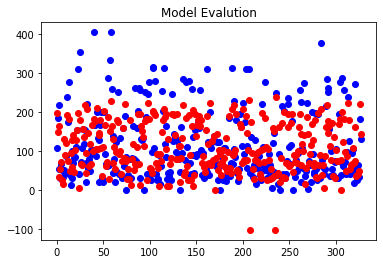

In [ ]:
# Plotting the scatter graph for visualization of model evaluation
plt.scatter(range(len(Y_test)), Y_test, color='blue')
plt.scatter(range(len(Y_Predict)), Y_Predict, color='red')
plt.title("Model Evalution")
plt.show()

### Model Evaluation using XGBRegressor

In [ ]:
# importing module for applying XGBRegressor
from xgboost import XGBRegressor

#### Model Training with XGBRegressor

In [ ]:
XGB_model = XGBRegressor()

In [ ]:
XGB_model.fit(X_train,Y_train)

[10:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
XGB_predict = XGB_model.predict(X_test)

In [ ]:

print("Mean squared error:",round(mean_squared_error(Y_test,XGB_predict), 2))
print("Mean absolute error:",round(mean_absolute_error(Y_test,XGB_predict), 2))
print(f"Training Accuracy: {round(XGB_model.score(X_train,Y_train)*100, 2)}%")
print(f"Testing Accuracy: {round(XGB_model.score(X_test,Y_test)*100, 2)}%")

Mean squared error: 1839.79
Mean absolute error: 30.87
Training Accuracy: 86.36%
Testing Accuracy: 76.07%


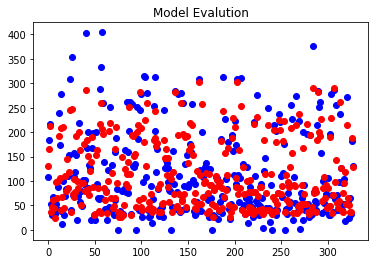

In [ ]:
plt.scatter(range(len(Y_test)), Y_test, color='blue')
plt.scatter(range(len(XGB_predict)), XGB_predict, color='red')
plt.title("Model Evalution")
plt.show()